In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score,StratifiedKFold
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler

In [4]:
!git clone https://github.com/taehojo/data.git

Cloning into 'data'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 21 (delta 3), reused 20 (delta 2), pack-reused 0
Unpacking objects: 100% (21/21), done.


In [8]:
df=pd.read_csv('/content/data/pima-indians-diabetes3.csv')
X=df.iloc[:,0:8]
y=df.iloc[:,8]
df.head()


,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   diabetes   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


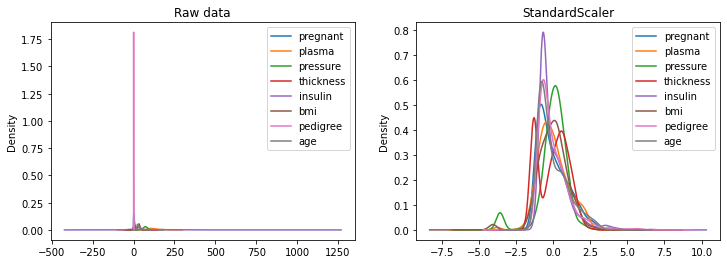

In [12]:
ss=StandardScaler()
scaled_X=pd.DataFrame(ss.fit_transform(X),columns=X.columns)
fig,ax=plt.subplots(1,2,figsize=(12,4))
X.plot(kind='kde',title='Raw data',ax=ax[0])
scaled_X.plot(kind='kde',title='StandardScaler',ax=ax[1])
plt.show()

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [22]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
skf=StratifiedKFold(n_splits=10,shuffle=True)
accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=skf)
print('Accuracy: {:.2f}%'.format(accuracies.mean()*100))
print('Standard Deviation: {:.2f}%'.format(accuracies.std()*100))

Accuracy: 65.65%
Standard Deviation: 3.83%


In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=50)
classifier.fit(X_train,y_train)
y_red=classifier.predict(X_test)
skf=StratifiedKFold(n_splits=10,shuffle=True)
accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=skf)
print('Accuracy: {:.2f}%'.format(accuracies.mean()*100))
print('Standard Deviation: {:.2f}%'.format(accuracies.std()*100))

Accuracy: 75.35%
Standard Deviation: 4.16%


In [26]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
skf=StratifiedKFold(n_splits=10,shuffle=True)
accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=skf)
print('Accuracy: {:.2f}%'.format(accuracies.mean()*100))
print('Standard Deviation: {:.2f}%'.format(accuracies.std()*100))

Accuracy: 74.83%
Standard Deviation: 3.87%


In [27]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
skf=StratifiedKFold(n_splits=10,shuffle=True)
accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=skf)
print('Accuracy: {:.2f}%'.format(accuracies.mean()*100))
print('Standard Deviation: {:.2f}%'.format(accuracies.std()*100))

Accuracy: 70.30%
Standard Deviation: 3.84%


In [28]:
from sklearn.ensemble import AdaBoostClassifier
classifier=AdaBoostClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
skf=StratifiedKFold(n_splits=10,shuffle=True)
accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=skf)
print('Accuracy: {:.2f}%'.format(accuracies.mean()*100))
print('Standard Deviation: {:.2f}%'.format(accuracies.std()*100))

Accuracy: 73.97%
Standard Deviation: 4.02%


In [30]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifier=QuadraticDiscriminantAnalysis()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
skf=StratifiedKFold(n_splits=10,shuffle=True)
accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=skf)
print('Accuracy: {:.2f}%'.format(accuracies.mean()*100))
print('Standard Deviation: {:.2f}%'.format(accuracies.std()*100))

Accuracy: 73.24%
Standard Deviation: 5.76%


In [33]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
skf=StratifiedKFold(n_splits=10,shuffle=True)
accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=skf)

# print(f.'Accuracy:'{accuracies.mean()*100,2f}'%')
# print(f.'Standard Deviation:'{accuracies.std()*100,2f}'%')
print('Accuracy: {:.2f}%'.format(accuracies.mean()*100))
print('Standard Deviation: {:.2f}%'.format(accuracies.std()*100))

Accuracy: 74.82%
Standard Deviation: 5.12%


In [59]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
skf=StratifiedKFold(n_splits=10,shuffle=True)
accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=skf)

print(f"Accuracy:{accuracies.mean()*100}%")
print(f"Standard Deviation:{accuracies.std()*100}%")
# print('Accuracy: {:.2f}%'.format(accuracies.mean()*100))
# print('Standard Deviation: {:.2f}%'.format(accuracies.std()*100))


Accuracy:74.8185117967332%
Standard Deviation:3.101338156135356%


In [38]:
from sklearn.ensemble import VotingClassifier
clf1=AdaBoostClassifier()
clf2=RandomForestClassifier()
clf3=SVC(kernel='rbf')
classifier=VotingClassifier(estimators=[('lr',clf1),('rf',clf2),('rbf',clf3)])
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
skf=StratifiedKFold(n_splits=10,shuffle=True)
accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=skf)
print('Accuracy: {:.2f}%'.format(accuracies.mean()*100))
print('Standard Deviation: {:.2f}%'.format(accuracies.std()*100))

Accuracy: 73.96%
Standard Deviation: 5.20%


In [39]:
from sklearn.ensemble import BaggingClassifier
classifier=BaggingClassifier(base_estimator=SVC(kernel='rbf'),n_estimators=10)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
skf=StratifiedKFold(n_splits=10,shuffle=True)
accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=skf)
print('Accuracy: {:.2f}%'.format(accuracies.mean()*100))
print('Standard Deviation: {:.2f}%'.format(accuracies.std()*100))


Accuracy: 74.33%
Standard Deviation: 4.31%


mean accuracy of D_tree :67.70%
mean accuracy of RF :74.81%
mean accuracy of GNB :75.17%
mean accuracy of KNN :70.14%
mean accuracy of Ada :74.50%
mean accuracy of QDA :74.33%
mean accuracy of SVM_l :71.34%
mean accuracy of SVM_k :73.59%
mean accuracy of Voting :73.44%
mean accuracy of Bagging :73.97%


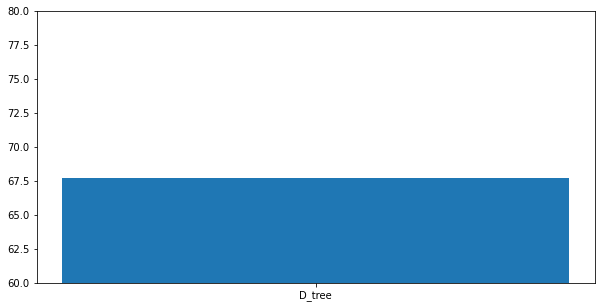

<Figure size 720x360 with 0 Axes>

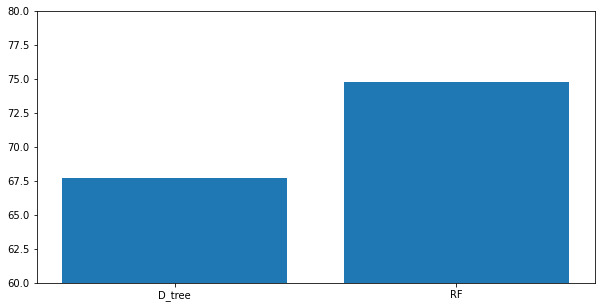

<Figure size 720x360 with 0 Axes>

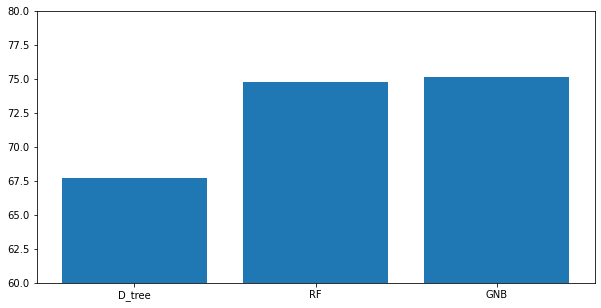

<Figure size 720x360 with 0 Axes>

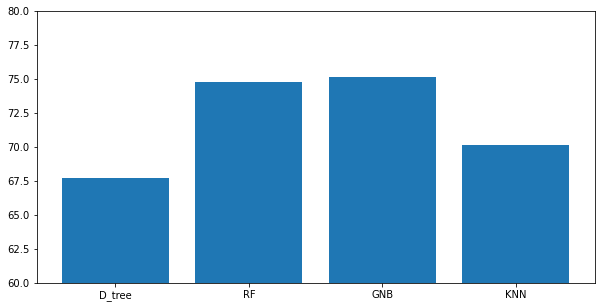

<Figure size 720x360 with 0 Axes>

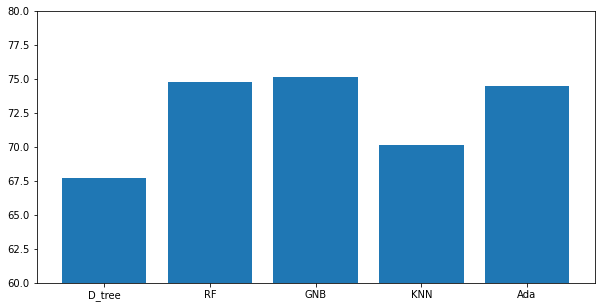

<Figure size 720x360 with 0 Axes>

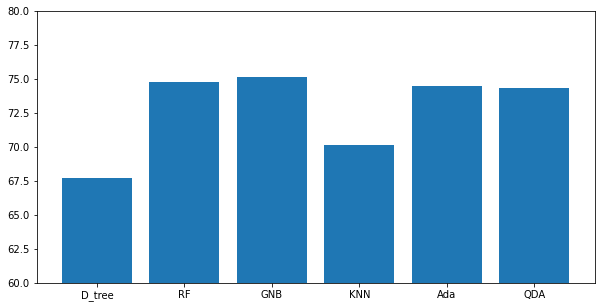

<Figure size 720x360 with 0 Axes>

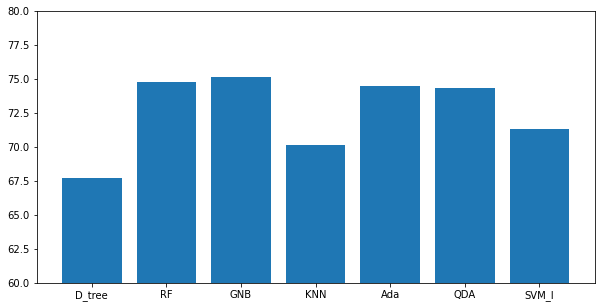

<Figure size 720x360 with 0 Axes>

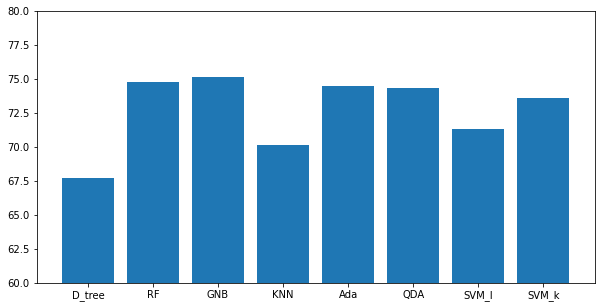

<Figure size 720x360 with 0 Axes>

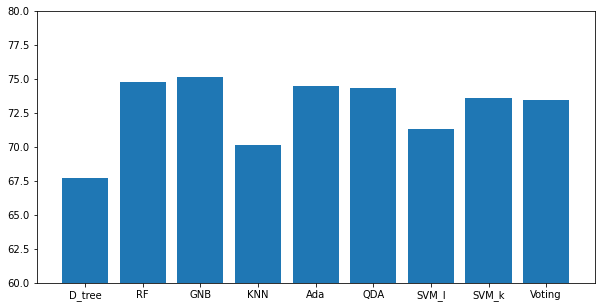

<Figure size 720x360 with 0 Axes>

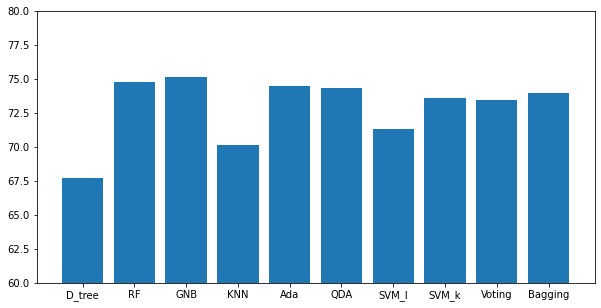

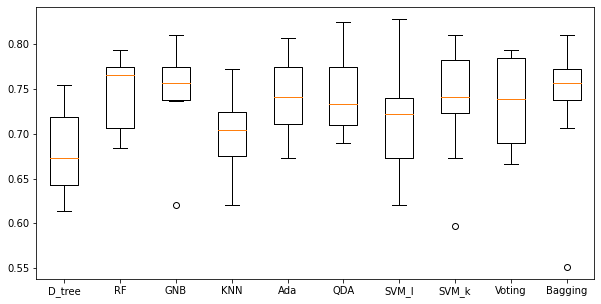

In [45]:
classifiers=[DecisionTreeClassifier(),
            RandomForestClassifier(),
            GaussianNB(),
            KNeighborsClassifier(),
            SVC(kernel='linear'),
            SVC(kernel='rbf'),
            AdaBoostClassifier(),
            QuadraticDiscriminantAnalysis(),
            VotingClassifier(estimators=[('1',AdaBoostClassifier()),
                             ('2',RandomForestClassifier()),
                             ('3',SVC(kernel='linear'))]),
            BaggingClassifier(base_estimator=clf3,n_estimators=10,random_state=0)
]
classifier_names=['D_tree',
                  'RF',
                  'GNB',
                  'KNN',
                  'Ada',
                  'QDA',
                  'SVM_l',
                  'SVM_k',
                  'Voting',
                  'Bagging']
modelaccuracies=[]
modelmeans=[]
modelnames=[]
classifier_data=zip(classifier_names,classifiers)
for classifier_name,classifier in classifier_data:
  skf=StratifiedKFold(n_splits=10,shuffle=True)
  accuracies=cross_val_score(classifier,X=X_train,y=y_train,cv=skf)
  print('mean accuracy of',classifier_name,':{:.2f}%'.format(accuracies.mean()*100))
  modelaccuracies.append(accuracies)
  modelnames.append(classifier_name)
  modelmeans.append(accuracies.mean()*100)


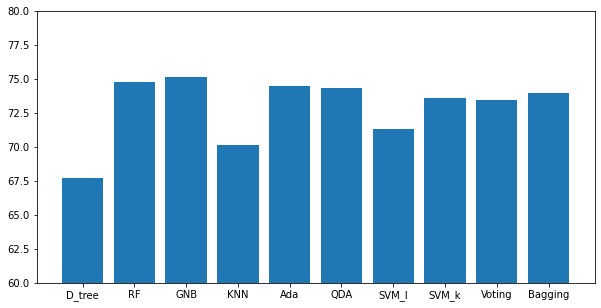

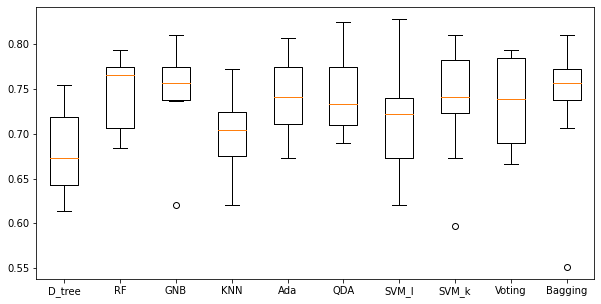

In [60]:
plt.figure(figsize=(10,5))
plt.ylim([60,80])
plt.bar(modelnames,modelmeans);
fig=plt.figure(figsize=(10,5)) 
ax=fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames)
plt.show()